In [79]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [80]:
len(train_data)

8982

In [81]:
len(test_data)

2246

In [82]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire= ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [83]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [84]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    result = np.zeros((len(sequences), 10000))
    for i,sequence in enumerate(sequences):
        result[i,sequence]=1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [85]:
from keras.utils import to_categorical
y_train= to_categorical(train_labels)
y_test= to_categorical(test_labels)

In [86]:
from keras import models
from keras import layers

In [87]:
network= models.Sequential()
network.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(46,activation='softmax'))

In [88]:
network.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='rmsprop')

In [89]:
x_val= x_train[:1000]
x_train_partial=x_train[1000:]
y_val= y_train[:1000]
y_train_partial=y_train[1000:]

In [90]:
network_fit = network.fit(x_train_partial,y_train_partial,epochs=20,validation_data=(x_val,y_val),batch_size=512)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 157us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoc

In [91]:
network_history= network_fit.history
network_history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [92]:
training_loss= network_history['loss']
training_accuracy= network_history['acc']
validation_loss= network_history['val_loss']
validation_accuracy= network_history['val_acc']
epoch= range(1,len(validation_loss)+1)

In [93]:
import matplotlib.pyplot as plt
%matplotlib notebook



<IPython.core.display.Javascript object>


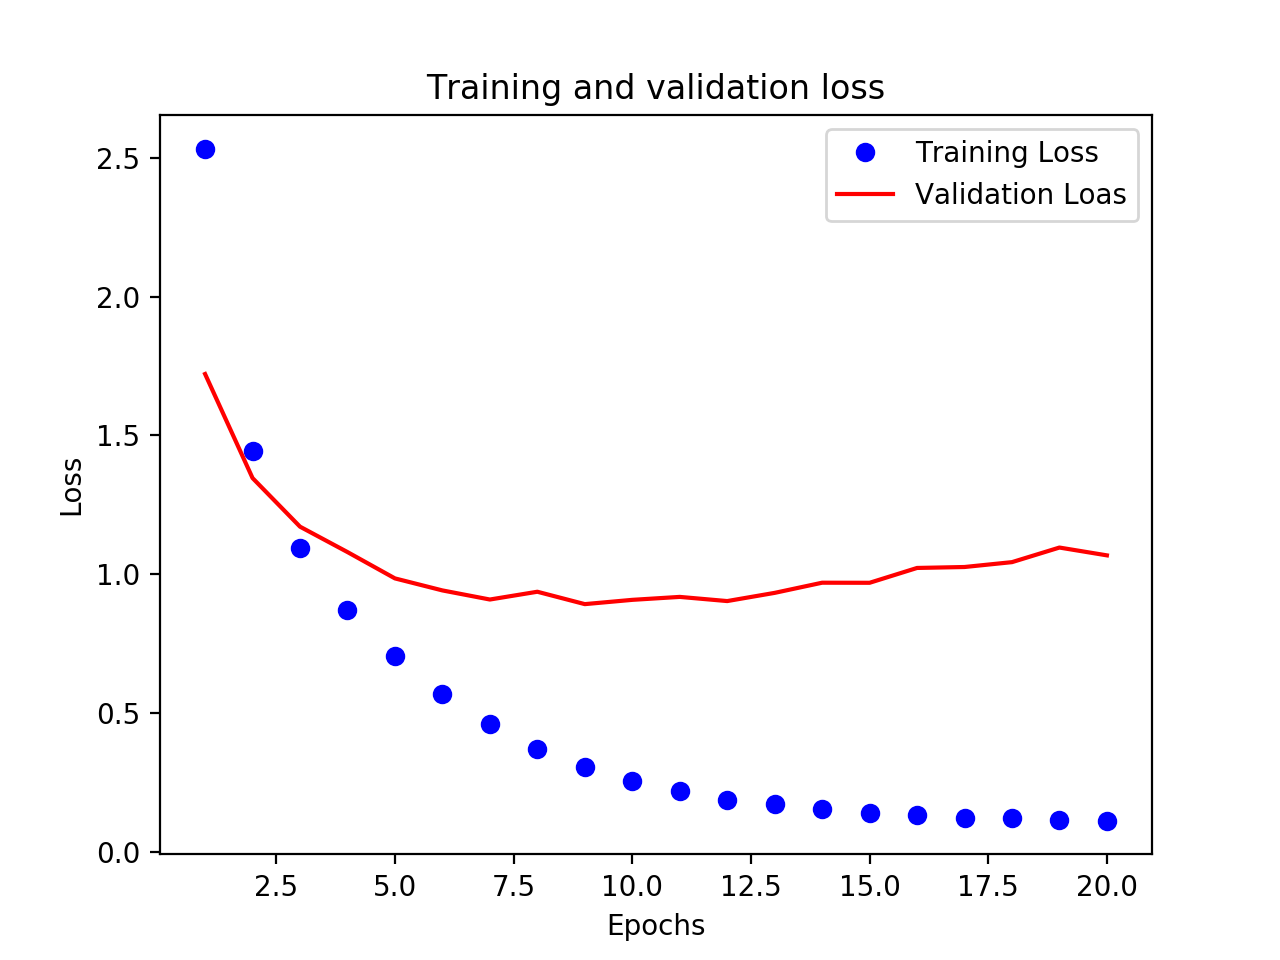

In [94]:
plt.figure()

plt.plot(epoch,training_loss,'bo',label='Training Loss')
plt.plot(epoch,validation_loss,'r',label='Validation Loas')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

<IPython.core.display.Javascript object>


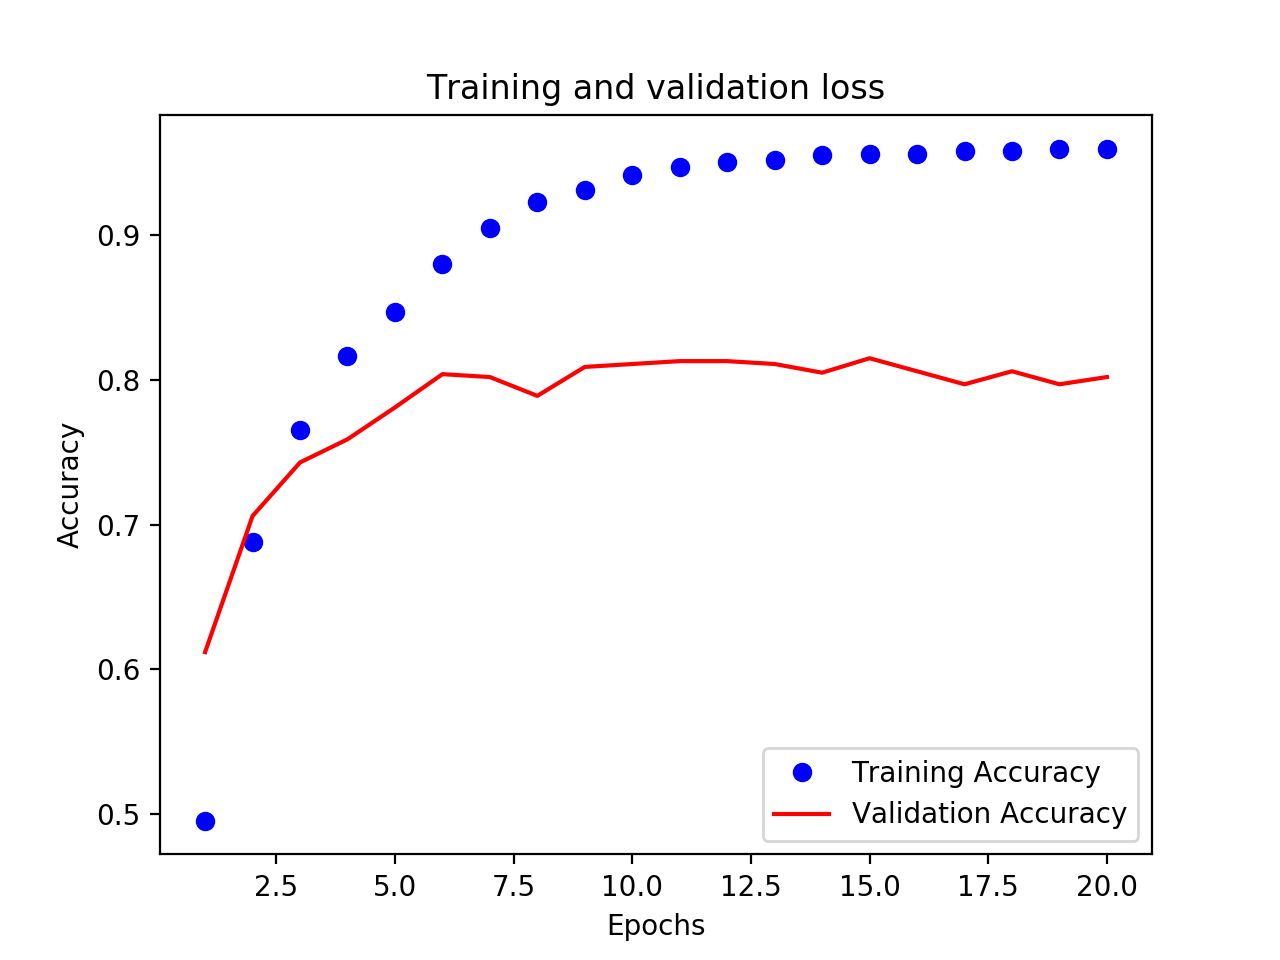

In [95]:
plt.figure()

plt.plot(epoch,training_accuracy,'bo',label='Training Accuracy')
plt.plot(epoch,validation_accuracy,'r',label='Validation Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()